In [1]:
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import clear_output

import json

import warnings

from sklearn import preprocessing

In [2]:
MODEL_FILE = "1.3. Esembler_Logistic_PA_POS.json"

In [3]:
# logistische Regression
LOG_PARAMS = {
    "random_state" : 0,
    "max_iter" : 500,
    "n_jobs" : -1
}

In [4]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [5]:
# Check if Models exists

In [6]:
model_path = DATASET_DIR / "Models" / MODEL_FILE
MODEL_EXIST = model_path.is_file()

In [7]:
# Daten

In [8]:
app_train = pd.read_csv(DATASET_DIR / "4. FillNA" / "application.csv")
pa_pos = pd.read_csv(DATASET_DIR / "4. FillNA" / "pa_pos.csv")
app_train = app_train.set_index("SK_ID_CURR")
pa_pos = pa_pos.set_index("SK_ID_CURR")

In [9]:
pa_pos.head()

,PA_CNT_CREDITS,PA_POS_CNT_PAYMENTS_LEFT,PA_POS_CNT_DPD,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_PRODUCT_COMBINATION_POS industry with interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
158271,1.0,0.0,0.0,6404.310,58905.000,65124.0,0.000000,58905.000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
252457,1.0,9.0,0.0,4951.350,47056.275,52641.0,4.275000,47056.275,0.000088,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
260094,9.0,70.0,0.0,97839.945,2023469.370,2294779.5,8765.370000,2023469.370,0.312513,0.0,1.0,1.0,1.0,1.0,0.0,1.0,4.0,3.0,0.0,4.0,0.0
176456,1.0,0.0,0.0,14713.605,123486.075,120307.5,12349.575000,123486.075,0.101388,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
256657,3.0,28.0,0.0,60139.575,1115806.500,1277523.0,10246.286731,1115806.500,0.699443,2.0,7.0,5.0,1.0,0.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0


In [10]:
# Ermittlung Reihenfolge

In [11]:
y = app_train.loc[pa_pos.index]["TARGET"]
x = pa_pos

In [12]:
x_col = x.columns
x_idx = x.index

In [13]:
# Scaling

In [14]:
scaler = preprocessing.StandardScaler().fit(x)

In [15]:
x = scaler.transform(x)

In [16]:
x = pd.DataFrame(x)
x.columns = x_col
x.index = x_idx
x.head()

,PA_CNT_CREDITS,PA_POS_CNT_PAYMENTS_LEFT,PA_POS_CNT_DPD,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_PRODUCT_COMBINATION_POS industry with interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
158271,-0.888423,-0.358508,-0.02179,-0.880820,-0.754223,-0.732598,-0.707018,-0.754223,-0.869425,-0.543656,-0.464490,-0.364585,0.193456,-0.454386,-0.570431,-0.398699,-0.755121,-0.730497,-0.416728,-0.401357,1.100530
252457,-0.888423,0.579673,-0.02179,-0.921917,-0.777095,-0.754666,-0.706680,-0.777095,-0.868937,0.445605,-0.464490,-0.364585,-1.622381,1.846507,0.807182,0.513013,-0.755121,-0.730497,0.893918,-0.401357,-0.450537
260094,3.337410,6.938455,-0.02179,1.705441,3.038075,3.209171,-0.014468,3.038075,0.855067,-0.543656,0.085391,0.360072,0.193456,0.696060,-0.570431,0.513013,2.084320,1.564739,-0.416728,3.777147,-0.450537
176456,-0.888423,-0.358508,-0.02179,-0.645791,-0.629558,-0.635040,0.268719,-0.629558,-0.309952,-0.543656,-0.464490,-0.364585,0.193456,-0.454386,-0.570431,-0.398699,-0.755121,-0.730497,-0.416728,-0.401357,1.100530
256657,0.168035,2.560277,-0.02179,0.639084,1.285968,1.410781,0.102539,1.285968,2.990206,1.434866,3.384675,3.258700,0.193456,-0.454386,2.184795,4.159864,-0.755121,0.799660,0.893918,-0.401357,-0.450537


In [17]:
if not MODEL_EXIST:
    # unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

    model = LogisticRegression(**LOG_PARAMS).fit(x_train, y_train)

    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    print(auc)

    # Koeffizienten der einzelnen Klassen
    coef_dict = {}
    for coef, feat in zip(model.coef_[0], x_col):
        coef_dict[feat] = np.abs(coef)

    # Feature Importance
    d = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))
    order = list(d.keys())
    
    model_data = {
    "todo" : order,
    "keep" : [],
    "drop" : [],
    "params" : LOG_PARAMS,
    "auc" : [],
    "p" : [],
    "n" : []
    }
    
    auc_temp = 0.5

In [18]:
if MODEL_EXIST:
    with open(DATASET_DIR / "Models" / MODEL_FILE, 'r') as file:
        model_data = json.load(file)
    auc_temp = model_data["auc"][-1]

In [19]:
#Logistische Regression Parameterbestimmung

In [20]:
df = pa_pos

print('auc: %s, todo: %s, keep: %s, drop: %s' % (round(auc_temp,4), len(model_data["todo"]), len(model_data["keep"]), len(model_data["drop"])))
todo = model_data["todo"].copy()

for head in todo:
    
    model_data["keep"].append(head)
    
    X = df[model_data["keep"]]
    y = app_train.loc[pa_pos.index]["TARGET"]
    x = X
    
    scaler = preprocessing.StandardScaler().fit(x)
    x = scaler.transform(x)
    
    model = LogisticRegression(**LOG_PARAMS).fit(x, y)
    
    aucs = []

    kfold = KFold(5, shuffle=True, random_state=1)

    for train, test in kfold.split(x):
        model.fit(x[train], y.iloc[train])
        auc = roc_auc_score(y.iloc[test], model.predict_proba(x[test])[:,1])
        aucs.append(auc)
    
    auc = np.mean(aucs)
    n = len(X)
    p = len(X.columns)
    
    if auc > auc_temp:
        
        model_data["auc"].append(auc)
        model_data["p"].append(p)
        model_data["n"].append(n)
        
        auc_temp = auc
        
    else:
        model_data["keep"].remove(head)
        model_data["drop"].append(head)
    
    model_data["todo"].remove(head)
    
    with open(DATASET_DIR / "Models" / MODEL_FILE, 'w') as file:
        json.dump(model_data, file)
    
    clear_output(wait=True)
    print('auc: %s, todo: %s, keep: %s, drop: %s' % (round(auc,4), len(model_data["todo"]), len(model_data["keep"]), len(model_data["drop"])))

auc: 0.6351, todo: 0, keep: 20, drop: 1


         auc   p       n
19  0.635056  20  286967


<AxesSubplot:>

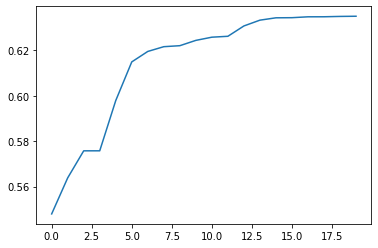

In [21]:
data = {
    "auc" : model_data["auc"],
    "p" : model_data["p"],
    "n" : model_data["n"]
}

result = pd.DataFrame(data)

print(result[result["auc"] == result["auc"].max()])
result["auc"].plot()

In [22]:
model_data["keep"]

['PA_AMT_CREDIT',
 'PA_AMT_ANNUITY',
 'PA_AMT_APPLICATION',
 'PA_AMT_GOODS_PRICE',
 'PA_CNT_NAME_YIELD_GROUP_high',
 'PA_CNT_NAME_CONTRACT_STATUS_Refused',
 'PA_CNT_CREDITS',
 'PA_POS_CNT_PAYMENTS_LEFT',
 'PA_CNT_PRODUCT_COMBINATION_POS industry with interest',
 'PA_AMT_DOWN_PAYMENT',
 'PA_CNT_NAME_CONTRACT_TYPE_Revolving loans',
 'PA_RATE_DOWN_PAYMENT',
 'PA_CNT_NAME_CLIENT_TYPE_New',
 'PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low',
 'PA_POS_CNT_DPD',
 'PA_CNT_NAME_YIELD_GROUP_low_normal',
 'PA_CNT_NAME_CLIENT_TYPE_Refreshed',
 'PA_CNT_NAME_PORTFOLIO_Cards',
 'PA_CNT_NAME_PRODUCT_TYPE_walk-in',
 'PA_CNT_CODE_REJECT_REASON_HC']

In [23]:
model_data["drop"]

['PA_CNT_PRODUCT_COMBINATION_Card Street']

In [24]:
model = LogisticRegression(**LOG_PARAMS)

aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = df[model_data["keep"]]

y = app_train.loc[pa_pos.index]["TARGET"]
x = df[model_data["keep"]]

for ID_TRAIN, ID_TEST in kfold.split(data):
    
    x_train = x.iloc[ID_TRAIN]
    y_train = y.iloc[ID_TRAIN]
    x_test = x.iloc[ID_TEST]
    y_test = y.iloc[ID_TEST]
    
    scaler = preprocessing.StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    scaler = preprocessing.StandardScaler().fit(x_test)
    x_test = scaler.transform(x_test)
    
    model.fit(x_train, y_train)
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    aucs.append(auc)
    
    print('train: %s, test: %s, auc: %s' % (ID_TRAIN, ID_TEST, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

train: [     0      2      3 ... 286964 286965 286966], test: [     1      4      6 ... 286940 286944 286946], auc: 0.6356297221029656
train: [     0      1      2 ... 286963 286964 286966], test: [     3     18     22 ... 286959 286961 286965], auc: 0.6348584353975258
train: [     0      1      2 ... 286964 286965 286966], test: [     9     10     12 ... 286951 286958 286960], auc: 0.6339596924291394
train: [     0      1      3 ... 286963 286964 286965], test: [     2     11     23 ... 286954 286957 286966], auc: 0.6325944389705487
train: [     1      2      3 ... 286961 286965 286966], test: [     0      5      7 ... 286962 286963 286964], auc: 0.6383903817156263


Durchschnitt: 0.64
Standardabw.: 0.00
Varianz:      0.00


In [25]:
len(model_data["keep"])

20